In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

C:\Users\jthatcher4\AppData\Local\Temp\ipykernel_14932\2391021159.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Filling missing numeric values with mean


Root Condition of Decision Tree:
|--- Species <= 1.50
|   |--- Sex <= 1.50
|   |   |--- Delta 13 C (o/oo) <= -24.72
|   |   |   |--- Culmen Depth (mm) <= 17.05
|   |   |   |   |--- Flipper Length (mm) <= 197.00
|   |   |   |   |   |--- Delta 15 N (o/oo) <= 8.71
|   |   |   |   |   |   |--- Culmen Length (mm) <= 36.05
|   |   |   |   |   |   |   |--- Clutch Completion <= 0.50
|   |   |   |   |   |   |   |   |--- value: [3050.00]
|   |   |   |   |   |   |   |--- Clutch Completion >  0.50
|   |   |   |   |   |   |   |   |--- value: [3350.00]
|   |   |   |   |   |   |--- Culmen Length (mm) >  36.05
|   |   |   |   |   |   |   |--- Clutch Completion <= 0.50
|   |   |   |   |   |   |   |   |--- value: [3400.00]
|   |   |   |   |   |   |   |--- Clutch Completion >  0.50
|   |   |   |   |   |   |   |   |--- Flipper Length (mm) <= 186.00
|   |   |   |   |   |   |   |   |   |--- value: [3600.00]
|   |   |   |   |   |   |   |   |--- Flipper Length (mm) >  186.00
|   |   |   |   |   |   |   |   | 

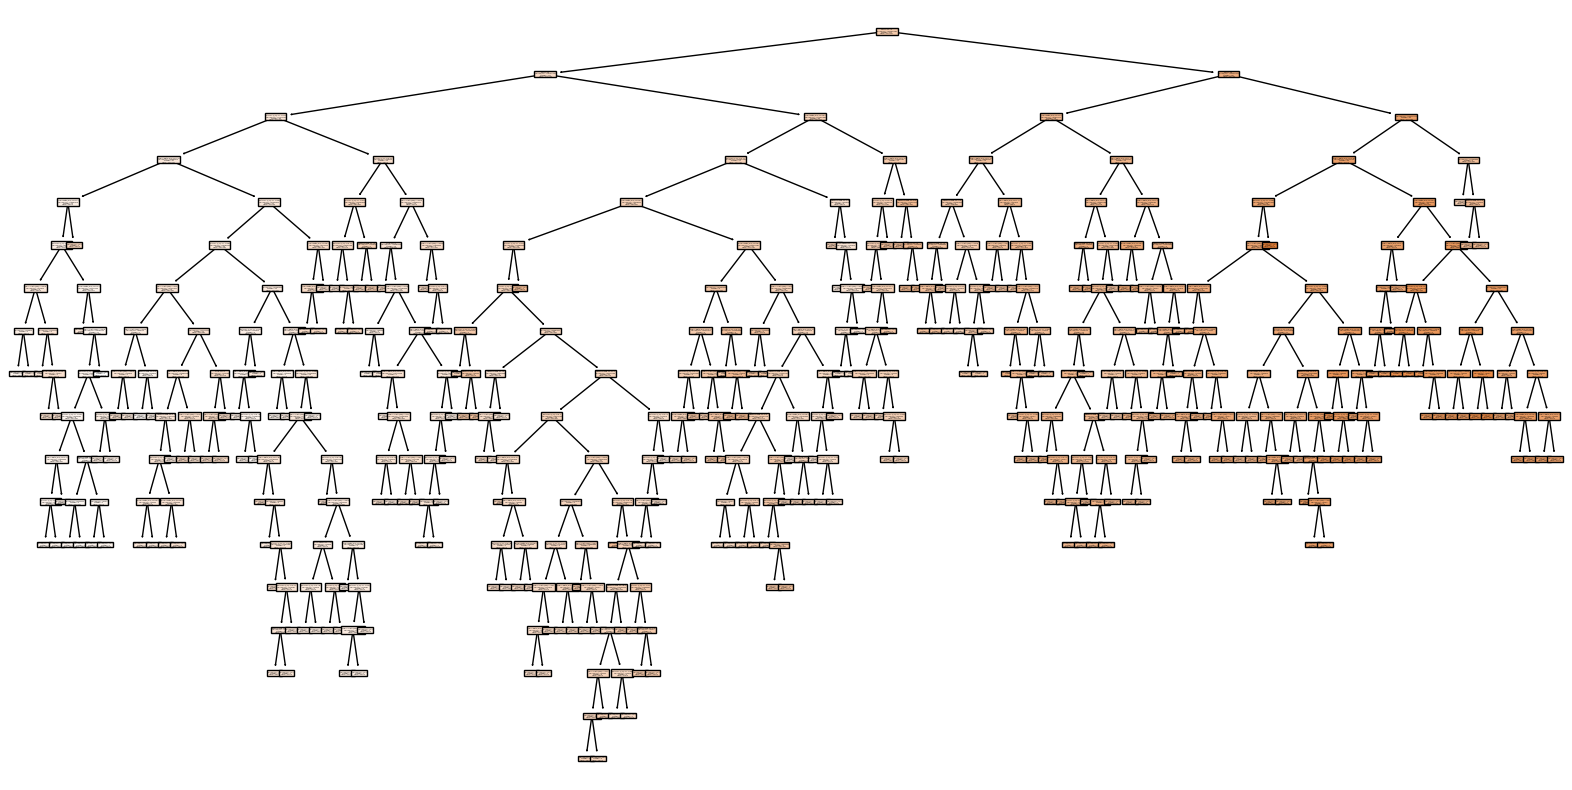

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text
import matplotlib.pyplot as plt

# Load the dataframe
# Assuming your dataframe is already loaded and named df

# Drop rows with missing values in the target variable (Body Mass)
df.dropna(subset=['Body Mass (g)'], inplace=True)

# Fill missing values in other columns with appropriate strategies
df.fillna(df.mean(), inplace=True)  # Filling missing numeric values with mean

# Encode 'Clutch Completion' column
df['Clutch Completion'] = le.fit_transform(df['Clutch Completion'])

# Encode categorical variables
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Region'] = le.fit_transform(df['Region'])
df['Island'] = le.fit_transform(df['Island'])
df['Stage'] = le.fit_transform(df['Stage'])
df['Sex'] = le.fit_transform(df['Sex'])

# Select features and target variable
X = df.drop(['Body Mass (g)', 'studyName', 'Individual ID', 'Date Egg', 'Comments'], axis=1)
y = df['Body Mass (g)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Describe the root condition of the tree
tree_rules = export_text(tree_reg, feature_names=list(X.columns))
print("Root Condition of Decision Tree:")
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_reg, feature_names=list(X.columns), filled=True)
plt.show()